In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Sequential

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [5]:
model = Sequential([
        Conv2D(64, (5, 5), padding="same", input_shape=(28, 28, 1), activation="relu"),
        MaxPooling2D((2,2)),
        Conv2D(128, (5, 5), padding="same", activation="relu"),
        MaxPooling2D((2,2)),
        Conv2D(128, (5, 5), padding="same", activation="relu"),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(10, activation="softmax")
    ])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         409728    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 128)       

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10
430/430 [==============================] - 18s 14ms/step - loss: 0.5516 - accuracy: 0.8023 - val_loss: 0.3600 - val_accuracy: 0.8774
Epoch 2/10
430/430 [==============================] - 5s 13ms/step - loss: 0.3220 - accuracy: 0.8844 - val_loss: 0.3203 - val_accuracy: 0.8848
Epoch 3/10
430/430 [==============================] - 6s 13ms/step - loss: 0.2702 - accuracy: 0.9017 - val_loss: 0.2543 - val_accuracy: 0.9086
Epoch 4/10
430/430 [==============================] - 5s 12ms/step - loss: 0.2341 - accuracy: 0.9150 - val_loss: 0.2596 - val_accuracy: 0.9046
Epoch 5/10
430/430 [==============================] - 6s 13ms/step - loss: 0.2072 - accuracy: 0.9250 - val_loss: 0.2456 - val_accuracy: 0.9080
Epoch 6/10
430/430 [==============================] - 5s 13ms/step - loss: 0.1860 - accuracy: 0.9312 - val_loss: 0.2309 - val_accuracy: 0.9144
Epoch 7/10
430/430 [==============================] - 5s 13ms/step - loss: 0.1644 - accuracy: 0.9394 - val_loss: 0.2321 - val_accuracy: 0.915

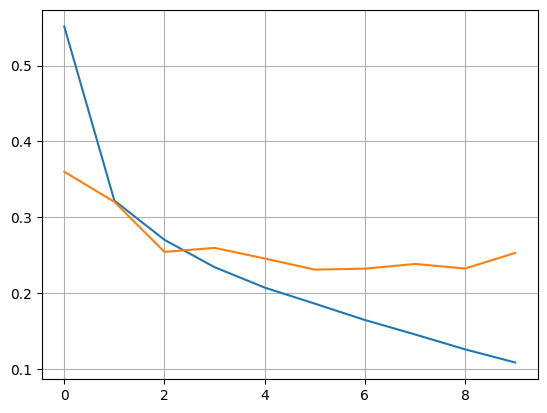

In [9]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="valid loss")
plt.grid()

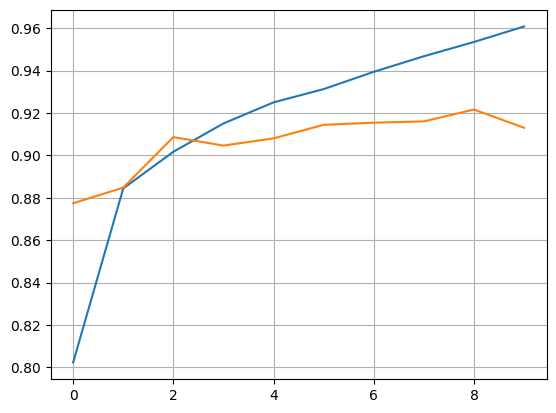

In [10]:
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="valid accuracy")
plt.grid()

In [11]:
# При згортковій нейромережі модель навчалась довше, але результат краще